# Assignment 2
# Ling Fei Zhang, 260985358
# Brandon Ma, 260983550

## Question 1

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from functions import SARSA
import time
import gymnasium as gym
import random
from tqdm import tqdm

Here, we will set a few parameters for our environment.

In [12]:
ALPHAS = [0.1, 0.3, 0.6]
GAMMA = 0.9
TEMPERATURE = [1, 10, 100]
EPISODES = 5500
SEEDS = np.arange(10)

Driver Code to test out the combination of each alpha with each temperature for SARSA.

In [13]:
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
env.reset()
sarsa = SARSA(env, 0.1, 1, GAMMA, EPISODES, False)
sarsa.simulate_episodes()
final_policy = sarsa.learned_policy
print("final policy:\n", final_policy.reshape(4,4)) #tabular format to better visualize
# print("total reward: ", rewards)

#uncomment this line if you want to vizualize the game
# env.visualize(final_policy, 10)

100%|██████████| 5500/5500 [00:01<00:00, 4461.83it/s]

final policy:
 [[2. 1. 2. 3.]
 [0. 2. 2. 3.]
 [3. 1. 0. 2.]
 [1. 1. 2. 0.]]


### Effect of parameters on final training performance for SARSA

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Ling0\AppData\Local\Temp\ipykernel_26932\1347728444.py:7: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(seed)
100%|██████████| 3/3 [02:00<00:00, 40.05s/it]


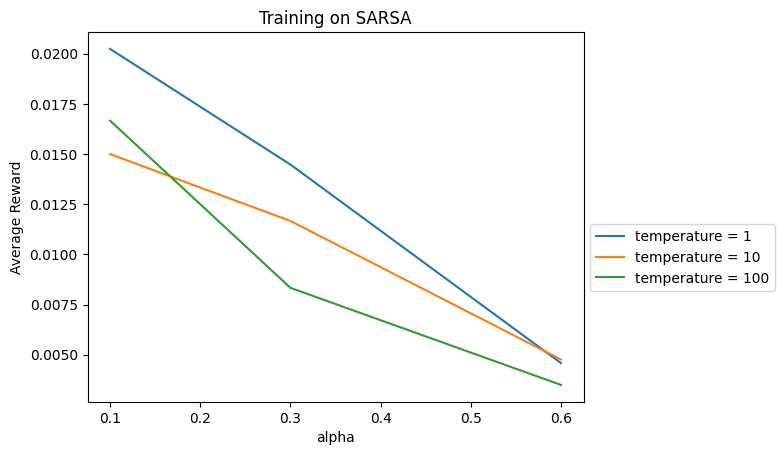

In [14]:
for temp in tqdm(TEMPERATURE):
    rewards_train = []
    for alpha in ALPHAS:
        average_reward_train = 0
        for seed in SEEDS:
            random.seed(seed)
            
            env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)
            env.reset()
            sarsa = SARSA(env, alpha, temp, GAMMA, EPISODES, False)
            sarsa.simulate_episodes()
            final_policy = sarsa.learned_policy
            last_training = sarsa.last_training()
            average_reward_train += last_training
            
        average_reward_train = average_reward_train/10
        rewards_train.append(average_reward_train)
        
    # for (a, r) in zip(ALPHAS, rewards_train):
    #     print(f"temperature {temp}: {(a,r)}")
    plt.plot(ALPHAS, rewards_train, label = f"temperature = {temp}")

plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Training on SARSA")
plt.xlabel("alpha")
plt.ylabel("Average Reward")
plt.show()

### Effect of parameters on final testing performance for SARSA

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Ling0\AppData\Local\Temp\ipykernel_26932\3279100222.py:6: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(seed)
100%|██████████| 3/3 [01:58<00:00, 39.44s/it]


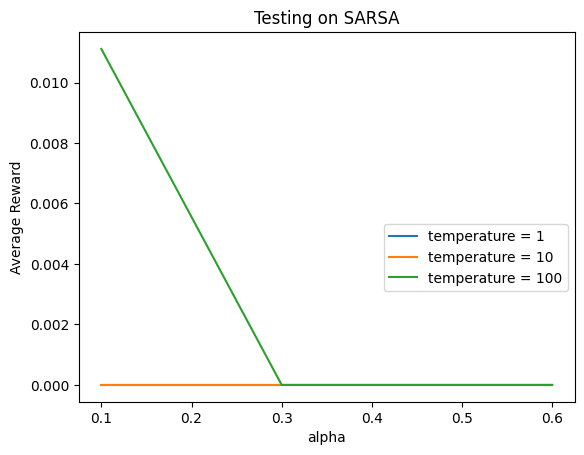

In [15]:
for temp in tqdm(TEMPERATURE):
    rewards_test = []
    for alpha in ALPHAS:
        average_reward_test = 0
        for seed in SEEDS:
            random.seed(seed)
            
            env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)
            env.reset()
            sarsa = SARSA(env, alpha, temp, GAMMA, EPISODES, False)
            sarsa.simulate_episodes()
            final_policy = sarsa.learned_policy
            last_test = sarsa.last_test()
            average_reward_test += last_test
            
        average_reward_test = average_reward_test/10
        rewards_test.append(average_reward_test)
        
    # for (a, r) in zip(ALPHAS, rewards_test):
    #     print(f"temperature {temp}: {(a,r)}")
    plt.plot(ALPHAS, rewards_test, label = f"temperature = {temp}")

plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Testing on SARSA")
plt.xlabel("alpha")
plt.ylabel("Average Reward")
plt.show()

### Best parameter for SARSA

### Conclusion for SARSA

### Effect of parameters on final training performance for EXPECTED SARSA

### Effect of parameters on final testing performance for EXPECTED SARSA

### Best parameter for EXPECTED SARSA

### Conclusion for EXPECTED SARSA